# Wstęp

- Dane : https://www.kaggle.com/datasets/camnugent/california-housing-prices/data


In [46]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.ticker as ticker


In [47]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")
df = pd.read_csv(os.path.join(path, 'housing.csv'))

# Wstepne poznanie danych opisy 

| **Zmienna**        | **Opis** |
|--------------------|----------|
| `longitude`        | 📍 **Długość geograficzna** — im większa, tym bardziej na **zachód** (bliżej oceanu). |
| `latitude`         | 📍 **Szerokość geograficzna** — im większa, tym bardziej na **północ** Kalifornii. |
| `housingMedianAge` | 🏠 Mediana wieku domów w danym obszarze — niższa wartość = **nowsze budynki**. |
| `totalRooms`       | 🛏️ Łączna liczba **wszystkich pomieszczeń** we wszystkich domach w danym bloku. |
| `totalBedrooms`    | 🛌 Łączna liczba **sypialni** w bloku. Może być skorelowana z `totalRooms`. |
| `population`       | 👥 Łączna liczba mieszkańców w danym bloku. |
| `households`       | 🏘️ Łączna liczba **gospodarstw domowych** (czyli „rodzin” lub grup mieszkających razem). |
| `medianIncome`     | 💰 Mediana dochodu na gospodarstwo domowe (**w dziesiątkach tysięcy USD**). |
| `medianHouseValue` | 🟩 Mediana ceny domu w bloku (**w USD**). To jest **zmienna zależna** w większości analiz. |
| `oceanProximity`   | 🌊 Kategoria opisująca **odległość od oceanu** (np. `NEAR OCEAN`, `INLAND`). |


-------------------


Każdy wiersz w tym zbiorze to **jeden blok (block group)** opisany przez jego:

1. **Położenie geograficzne**:
   - `longitude` i `latitude` → wskazują **lokalizację środka** tego bloku.

2. **Charakterystyki demograficzne i mieszkaniowe**:
   - np. `median_income`, `population`, `total_rooms`, `households` itd.

| latitude | longitude | median_house_value | median_income | total_rooms |
|----------|-----------|--------------------|----------------|--------------|
| 37.88    | -122.23   | 452 600            | 8.3252         | 880          |

### **Przykładowo :** 

> „W bloku zlokalizowanym w pobliżu (**37.88°N**, **122.23°W**), mediana wartości domów to **$452 600**, mediana dochodu to **~$83 252**, a łączna liczba pokoi to **880**.”

---

###  Kategorie `ocean_proximity`

| **Wartość**     | **Znaczenie**                                                                 |
|------------------|------------------------------------------------------------------------------|
| `NEAR BAY`       | Blisko zatoki (najczęściej Zatoka San Francisco)                             |
| `<1H OCEAN`      | Mniej niż 1 godzina jazdy od oceanu                                          |
| `INLAND`         | Głęboko w lądzie, z dala od oceanu                                           |
| `NEAR OCEAN`     | Bezpośrednio przy oceanie (wybrzeże Pacyfiku)                                |
| `ISLAND`         | Blok znajduje się na wyspie (rzadkie – w zbiorze jest ich zaledwie kilka)    |


In [48]:
df.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Widac roznice w total_bedrooms o 207 danych 

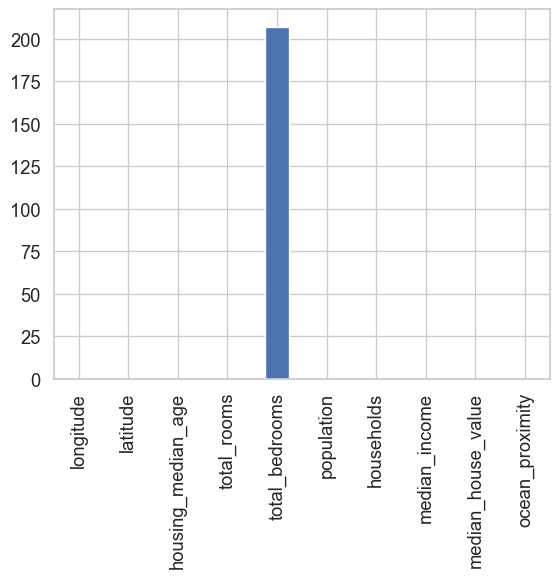

In [50]:

df.isna().sum().plot(kind="bar")

plt.show()


In [51]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [52]:
df.dropna(inplace=True)

df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Exploratory Data Analysis 

In [53]:
df.describe().round(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [54]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


- Brak duplikatów 

In [55]:
(df == 0).sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

- Brak wartosci zerowych

In [56]:
numeric_cols = df.select_dtypes(include='number').columns

(df[numeric_cols] < 0).sum()


longitude             20433
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
dtype: int64

- Brak wartości ujemnych

In [57]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:

df["median_income_t"] = df["median_income"] * 10000

df['rooms_per_household'] = (df['total_rooms'] / df['households']).round(2)
df['bedrooms_per_room'] = (df['total_bedrooms'] / df['total_rooms']).round(2)
df['population_per_household'] = (df['population'] / df['households']).round(2)

correlations = df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']].corr()


df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_t,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,83252.0,6.98,0.15,2.56
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,83014.0,6.24,0.16,2.11
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,72574.0,8.29,0.13,2.80
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,56431.0,5.82,0.18,2.55
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,38462.0,6.28,0.17,2.18


In [59]:
df[["rooms_per_household", "bedrooms_per_room", "population_per_household","ocean_proximity","median_house_value"]].nlargest(5, "rooms_per_household")


,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,median_house_value
1914,141.91,0.18,2.73,INLAND,500001.0
1979,132.53,0.26,2.40,INLAND,162500.0
12447,62.42,0.23,1.84,INLAND,87500.0
1913,61.81,0.18,2.33,INLAND,437500.0
11862,59.88,0.26,1.75,INLAND,67500.0


In [60]:
correlations['median_house_value'].drop('median_house_value')


rooms_per_household         0.151347
bedrooms_per_room          -0.255306
population_per_household   -0.023640
Name: median_house_value, dtype: float64

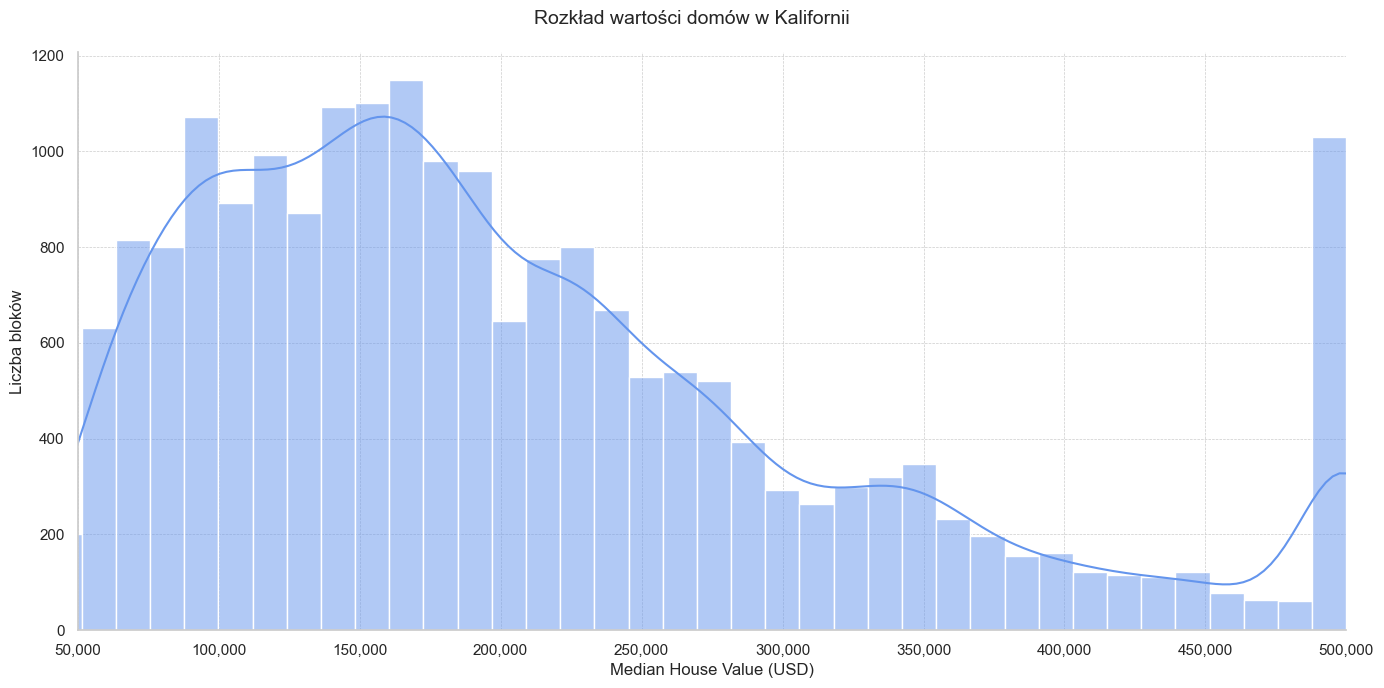

In [61]:

sns.set(style="whitegrid", palette="pastel")

g = sns.displot(
    data=df,
    kind="hist",
    x="median_house_value",
    height=7,
    aspect=2.0,
    bins=40,
    color="cornflowerblue",
    kde=True
)

for ax in g.axes.flatten():
    ax.set_xlim(50_000, 500_000)
    ax.set_xticks(np.arange(50_000, 500_001, 50_000))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.set_xlabel("Median House Value (USD)")
    ax.set_ylabel("Liczba bloków")
    ax.grid(True, linestyle="--", linewidth=0.5)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rozkład wartości domów w Kalifornii", fontsize=14)

plt.tight_layout()
plt.show()


In [62]:
df[df["median_house_value"]>500000]["median_house_value"].value_counts()

median_house_value
500001.0    958
Name: count, dtype: int64

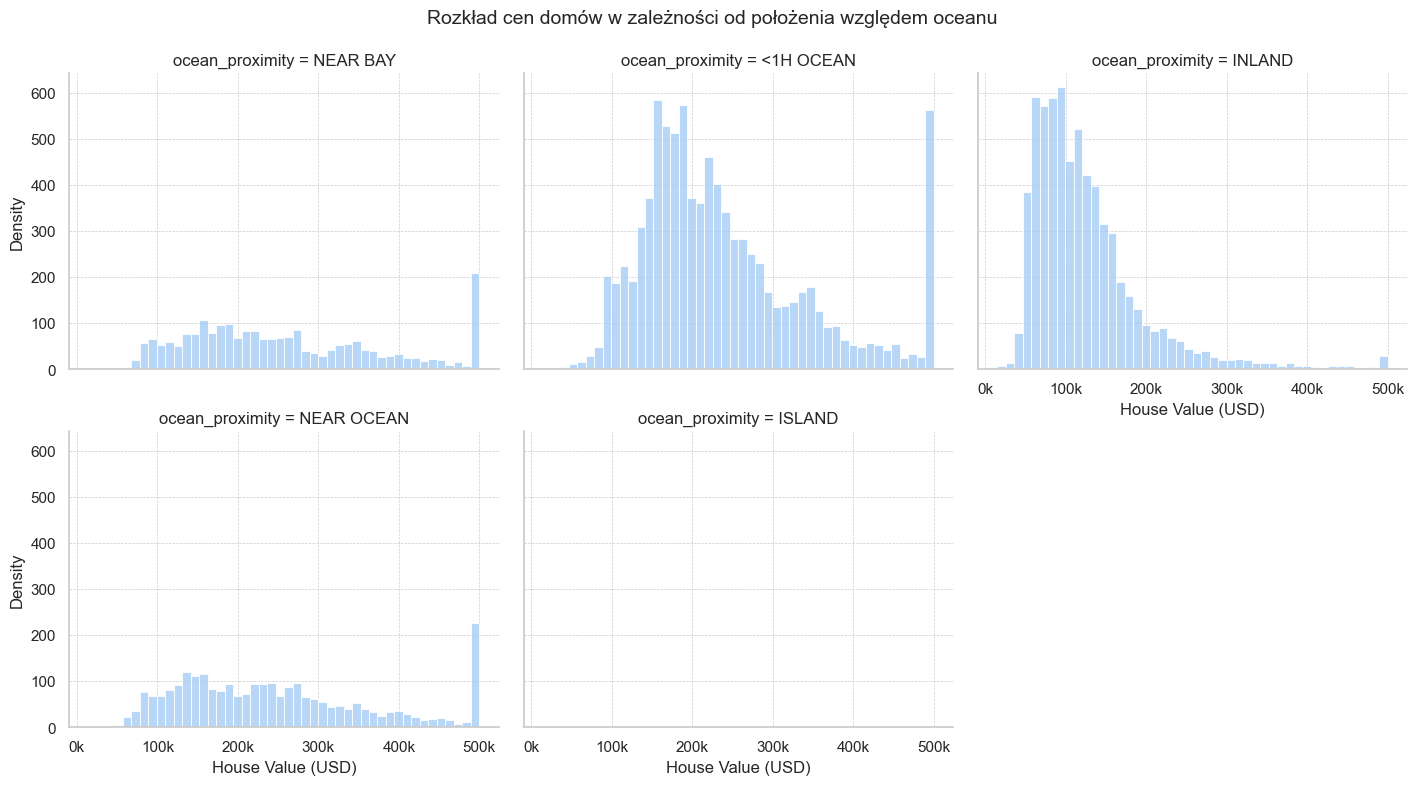

In [63]:
sns.set(style="whitegrid", palette="pastel")

g = sns.displot(
    data=df,
    kind="hist",
    x="median_house_value",
    col="ocean_proximity",
    col_wrap=3,
    height=4,
    aspect=1.2,
    fill=True,
    common_norm=False,
)

for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}k'))
    ax.set_xlabel("House Value (USD)")
    ax.set_ylabel("Density")
    ax.grid(True, linestyle="--", linewidth=0.5)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rozkład cen domów w zależności od położenia względem oceanu", fontsize=14)

plt.show()


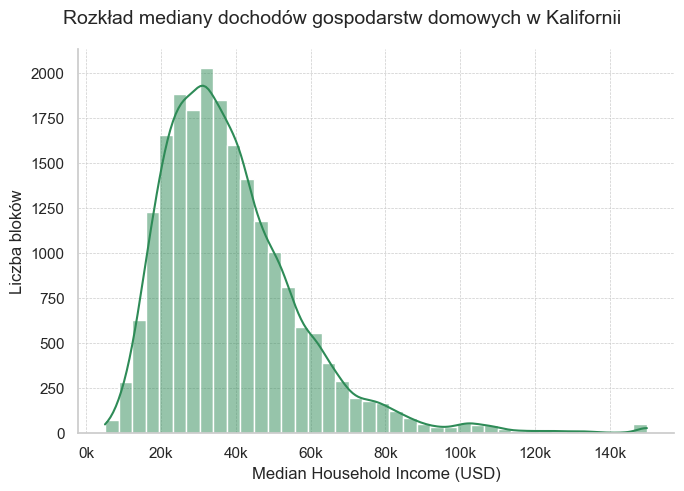

In [64]:

df["median_income_t"] = df["median_income"] * 10000

g = sns.displot(
    data=df,
    kind="hist",
    x="median_income_t",
    height=5,
    aspect=1.4,
    bins=40,
    color="seagreen",
    kde=True
)

for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}k'))
    ax.set_xlabel("Median Household Income (USD)")
    ax.set_ylabel("Liczba bloków")
    ax.grid(True, linestyle="--", linewidth=0.5)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rozkład mediany dochodów gospodarstw domowych w Kalifornii", fontsize=14)

plt.show()


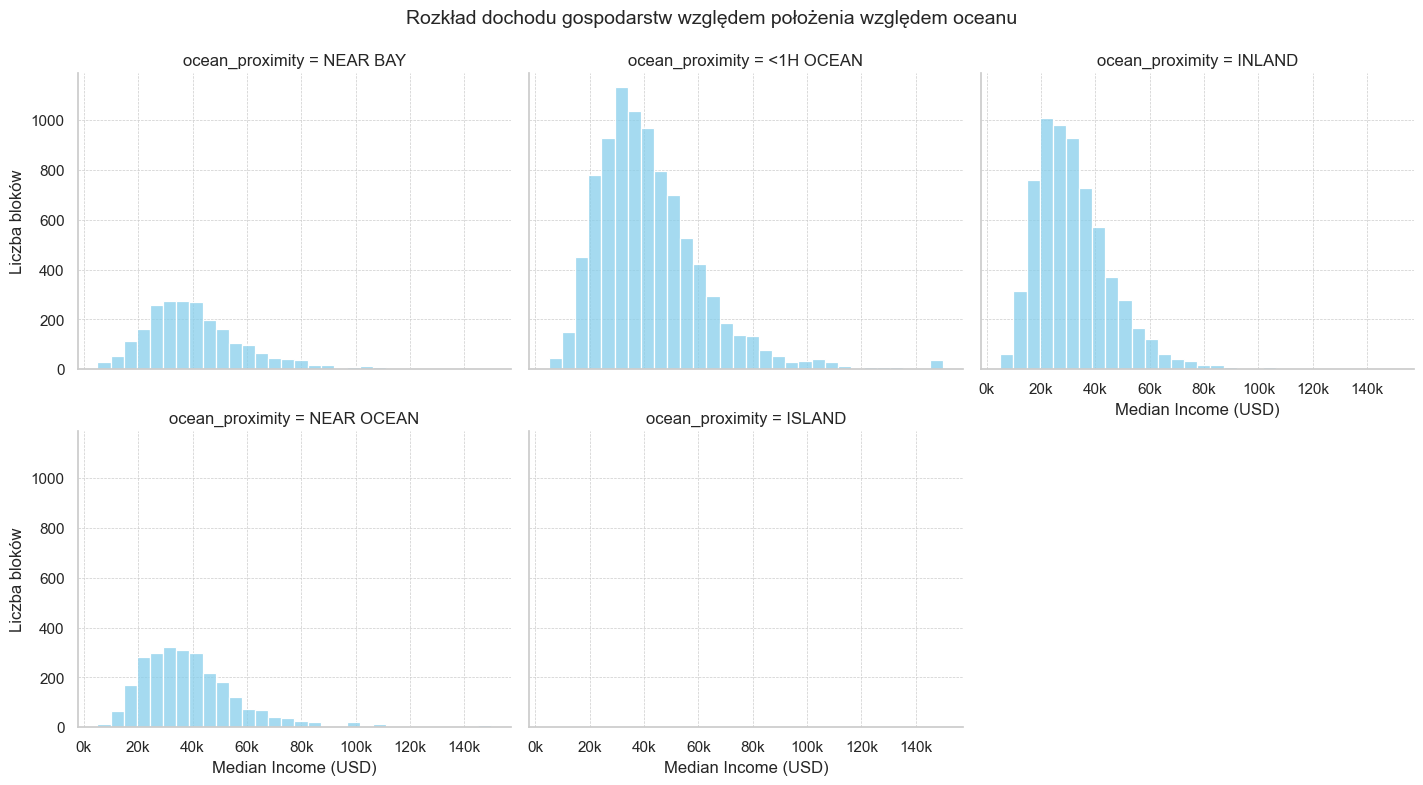

In [65]:

g = sns.displot(
    data=df,
    kind="hist",
    x="median_income_t",
    col="ocean_proximity",
    col_wrap=3,
    height=4,
    aspect=1.2,
    fill=True,
    common_norm=False,
    bins=30,
    color="skyblue"
)
for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}k'))
    ax.set_xlabel("Median Income (USD)")
    ax.set_ylabel("Liczba bloków")
    ax.grid(True, linestyle="--", linewidth=0.5)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rozkład dochodu gospodarstw względem położenia względem oceanu", fontsize=14)

plt.show()


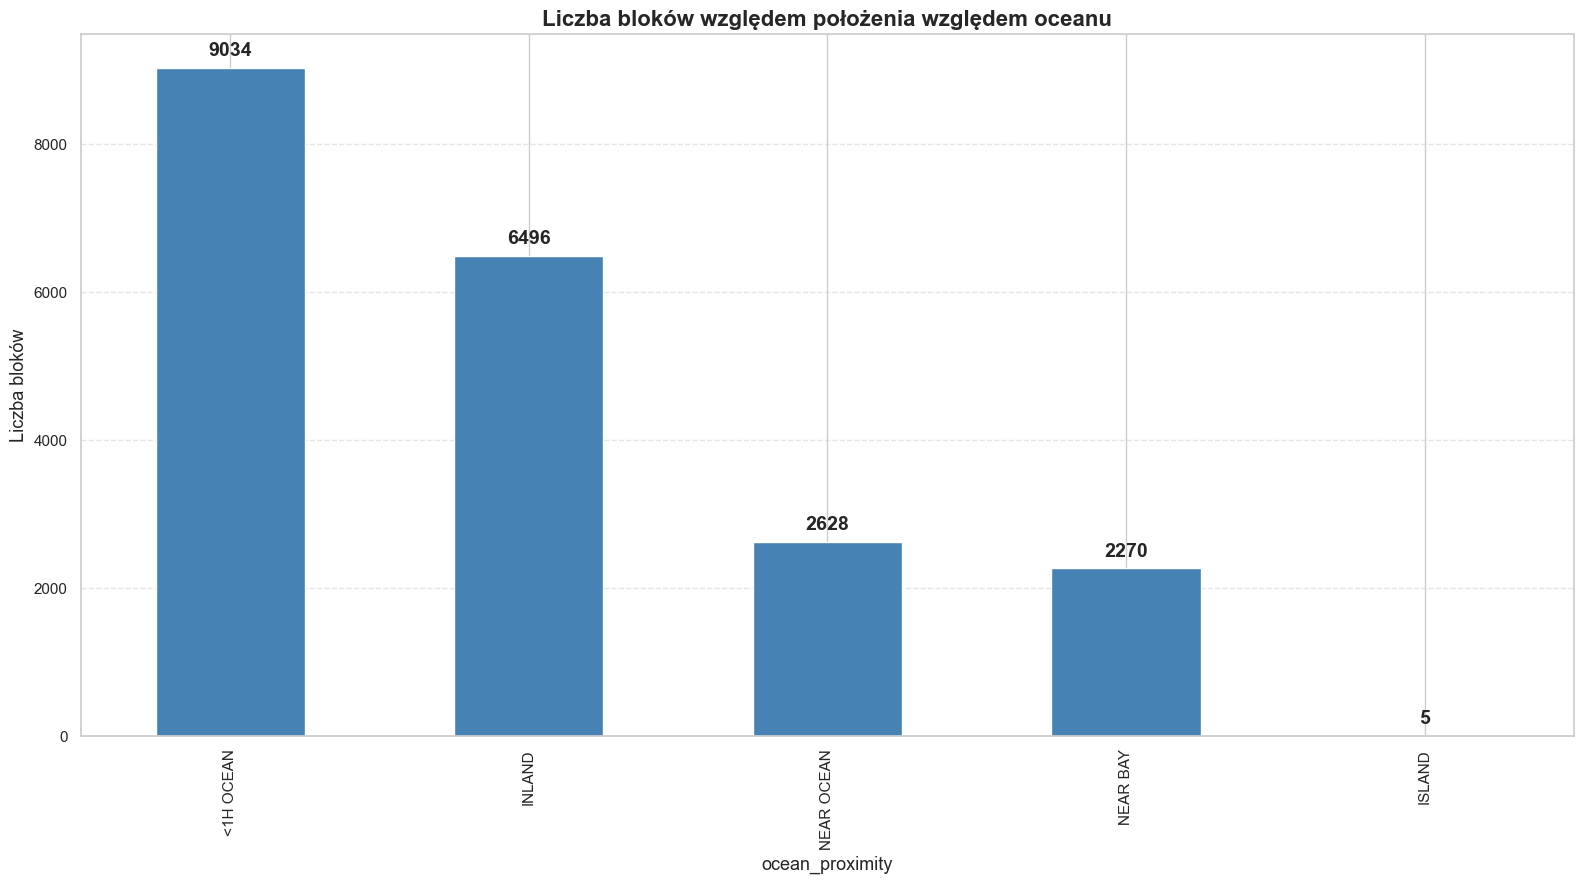

In [66]:
value_counts = df['ocean_proximity'].value_counts()

fig, ax = plt.subplots(figsize=(16, 9))  

value_counts.plot(kind="bar", color="steelblue", ax=ax)

for i, count in enumerate(value_counts):
    ax.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold')


ax.set_title("Liczba bloków względem położenia względem oceanu", fontsize=16, weight='bold')
ax.set_ylabel("Liczba bloków", fontsize=13)
ax.set_xlabel("ocean_proximity", fontsize=13)
ax.grid(axis='y', linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


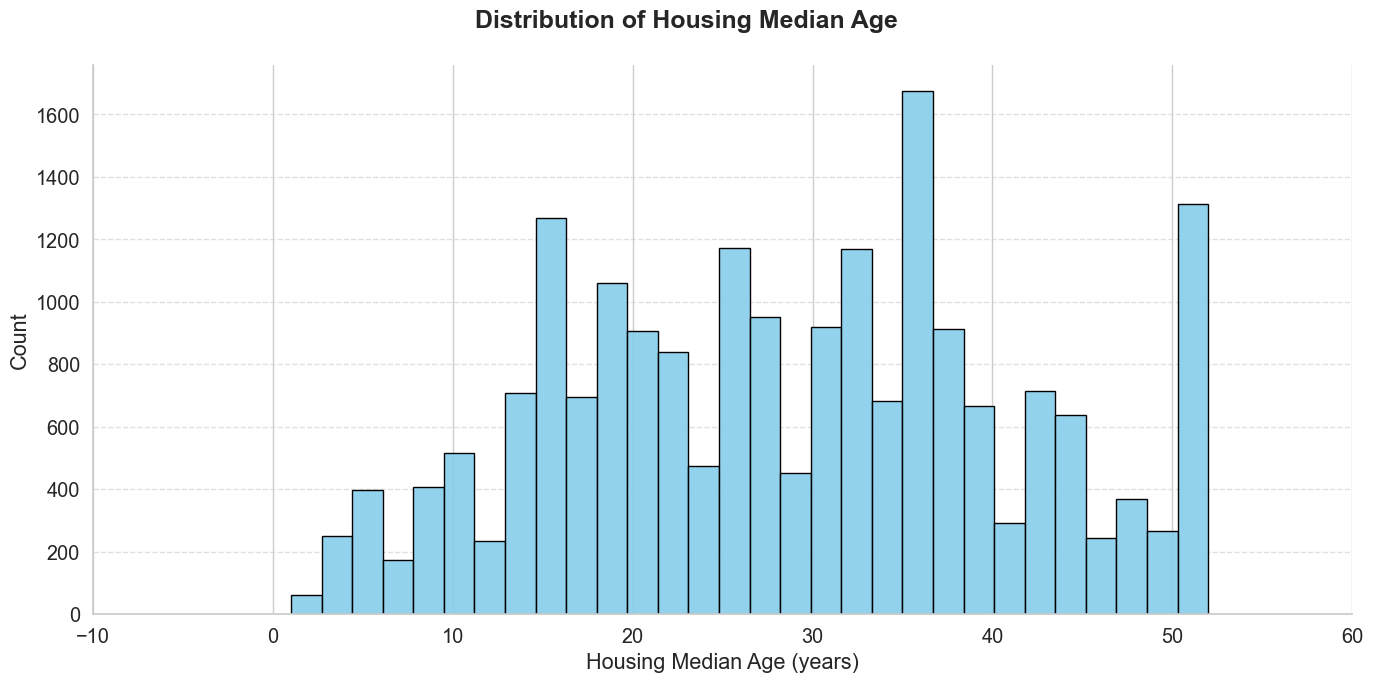

In [67]:

sns.set(style="whitegrid", font_scale=1.3)

g = sns.displot(
    data=df,
    x="housing_median_age",
    bins=30,
    color='skyblue',
    edgecolor='black',
    height=7,         
    aspect=2.0,        
    alpha=0.9
)

g.set_axis_labels("Housing Median Age (years)", "Count")
g.fig.suptitle("Distribution of Housing Median Age", fontsize=18, weight='bold')
g.set_xticklabels(rotation=0)

for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


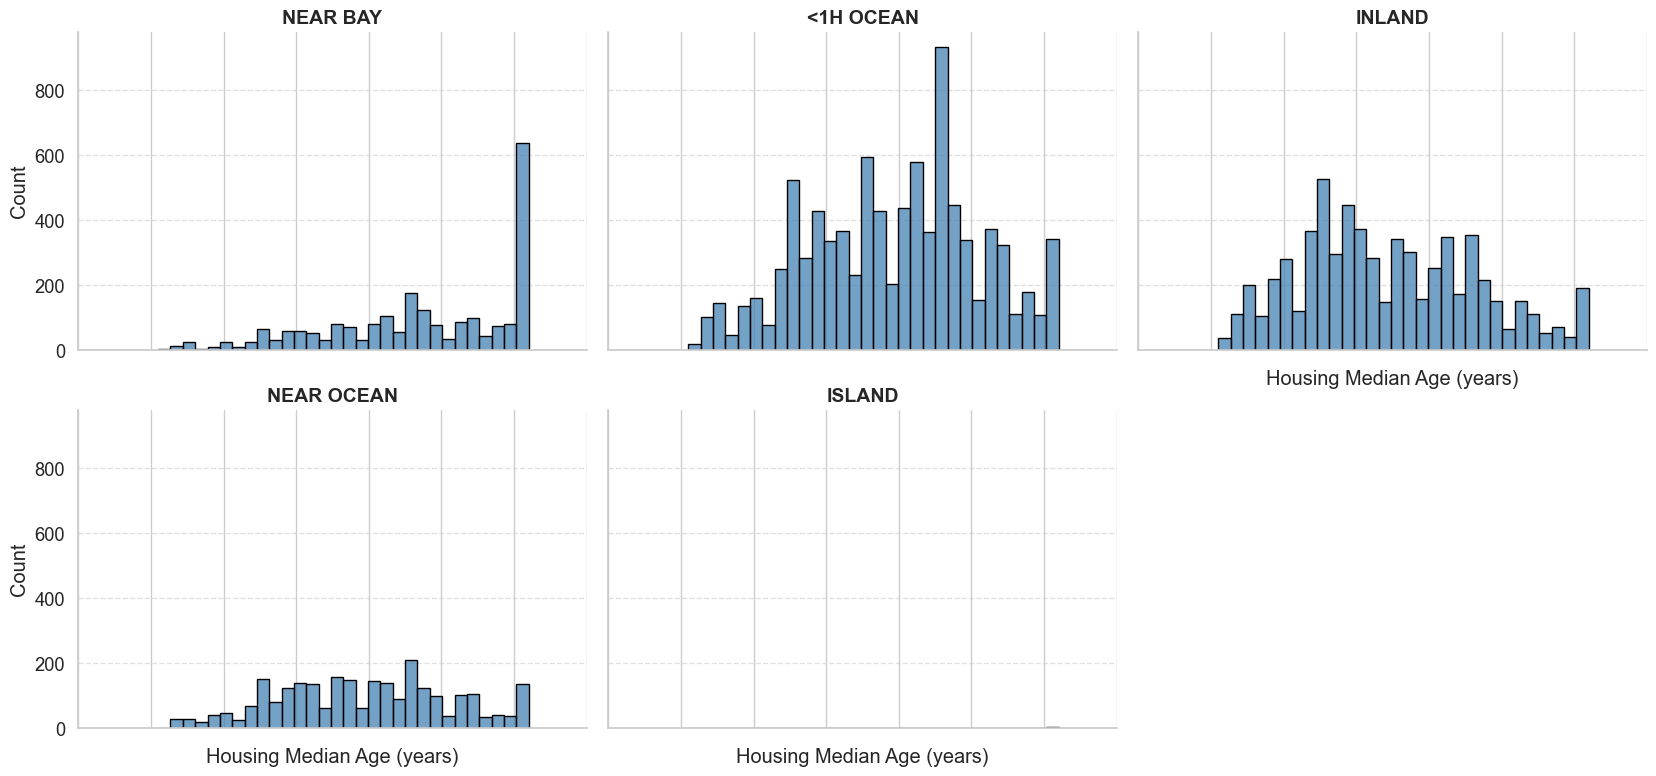

In [68]:
sns.set(style="whitegrid", font_scale=1.2)

g = sns.displot(
    data=df,
    x="housing_median_age",
    col="ocean_proximity",
    col_wrap=3,
    height=4,         
    aspect=1.4,   
    bins=30,
    color='steelblue',
    edgecolor='black'
)


g.set_titles(col_template="{col_name}", size=14, weight='bold')
g.set_axis_labels("Housing Median Age (years)", "Count")
g.set_xticklabels(rotation=0)


for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


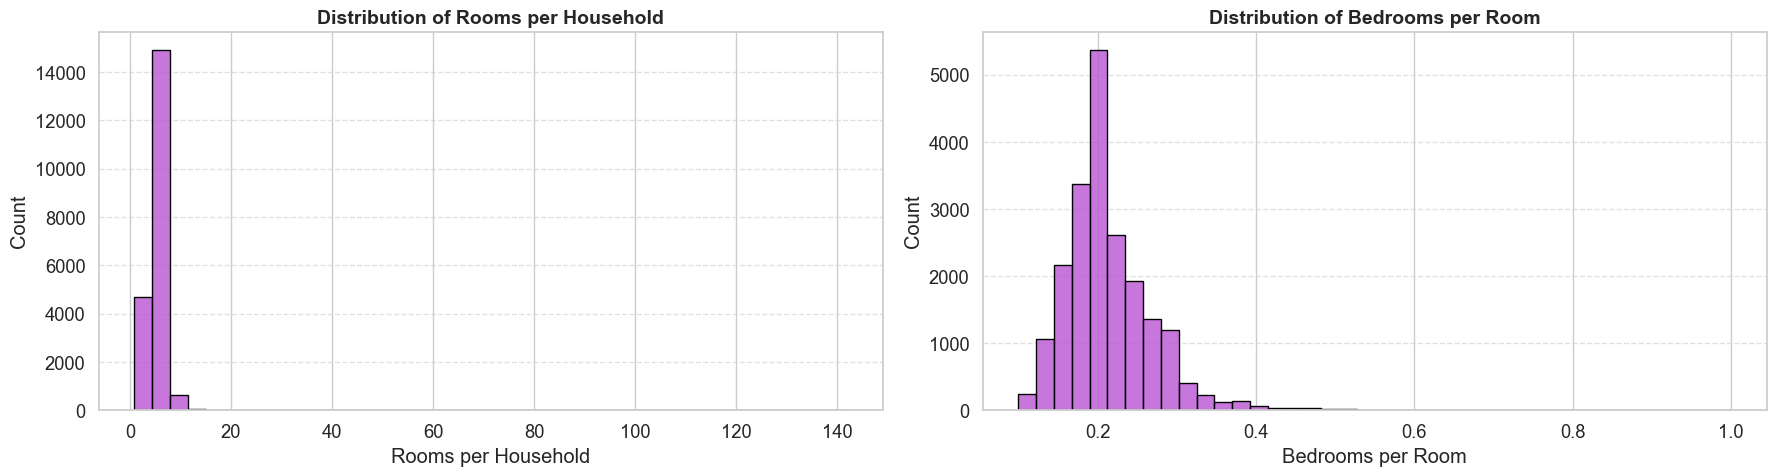

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)


columns = [
    ("rooms_per_household", "Rooms per Household"),
    ("bedrooms_per_room", "Bedrooms per Room"),
]


fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes = axes.flatten()


for ax, (col, label) in zip(axes, columns):
    sns.histplot(
        data=df,
        x=col,
        bins=40,
        color="mediumorchid",
        edgecolor="black",
        alpha=0.8,
        ax=ax
    )
    
    ax.set_title(f"Distribution of {label}", fontsize=14, weight='bold')
    ax.set_xlabel(label)
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
 
    if col == "population_per_household":
        ax.set_xlim(0, 15)
        ax.set_xticks(np.arange(0, 16, 1))

plt.tight_layout()
plt.show()


In [70]:
df["population_per_household"].nsmallest(5)

11849    0.69
5342     0.75
19522    0.97
19427    1.06
4623     1.07
Name: population_per_household, dtype: float64

In [71]:
df["population_per_household"].nlargest(10)

19006    1243.33
3364      599.71
16669     502.46
13034     230.17
9172       83.17
12104      63.75
16420      51.40
8874       41.21
13366      33.95
5986       21.33
Name: population_per_household, dtype: float64

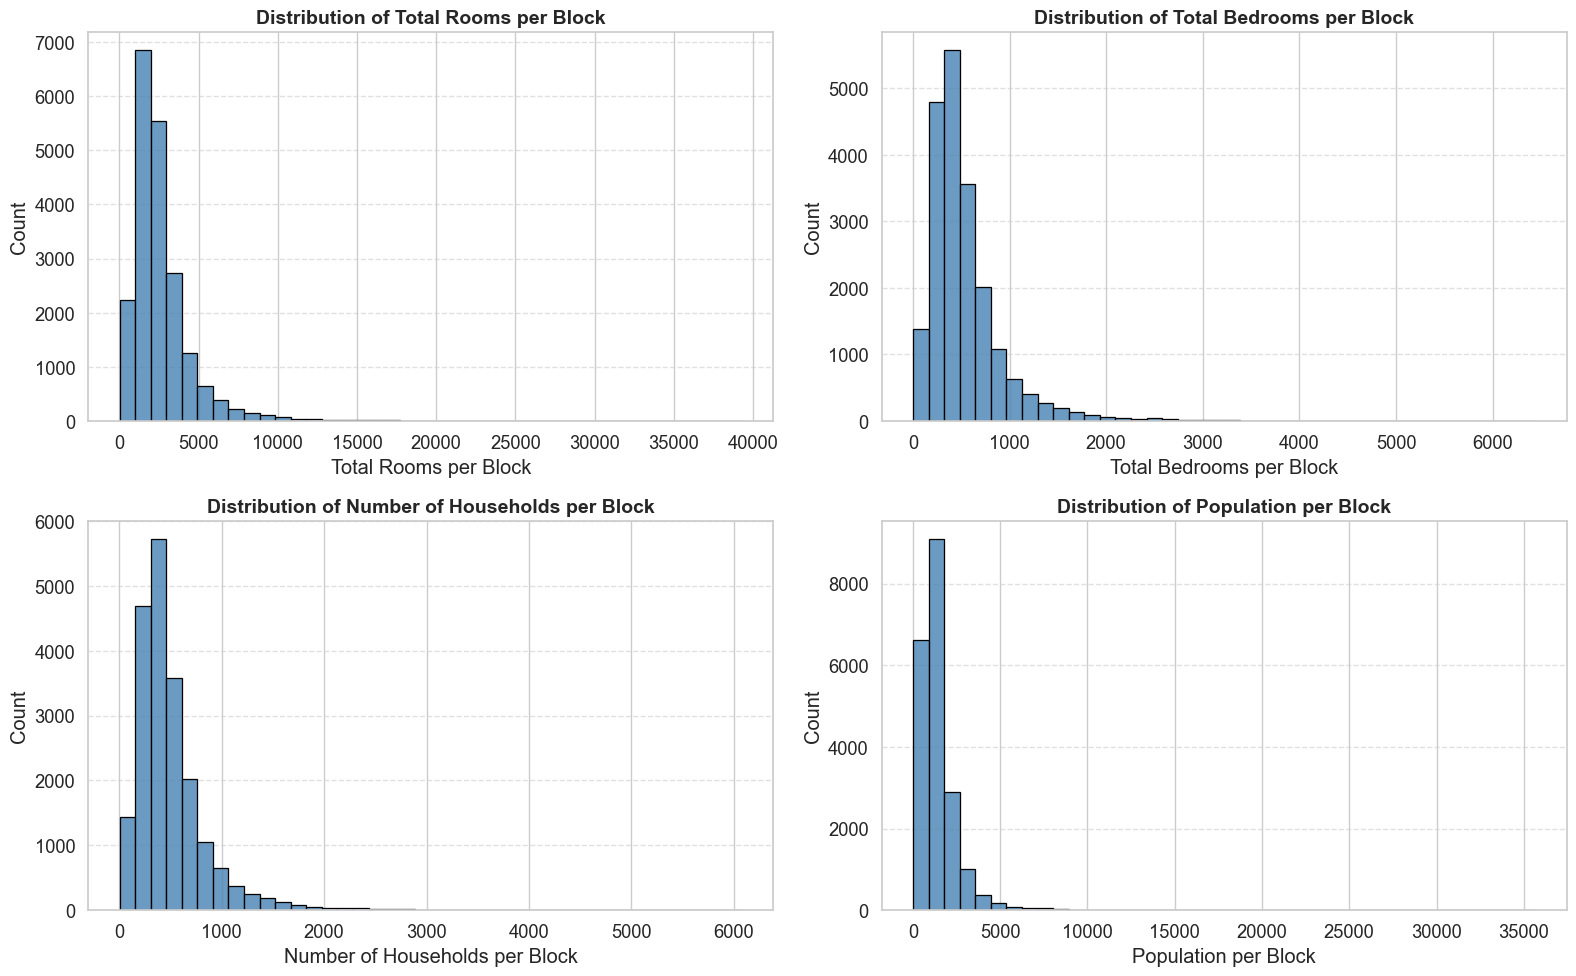

In [72]:

sns.set(style="whitegrid", font_scale=1.2)

columns = [
    ("total_rooms", "Total Rooms per Block"),
    ("total_bedrooms", "Total Bedrooms per Block"),
    ("households", "Number of Households per Block"),
    ("population", "Population per Block")
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for ax, (col, label) in zip(axes, columns):
    sns.histplot(
        data=df,
        x=col,
        bins=40,
        color="steelblue",
        edgecolor="black",
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"Distribution of {label}", fontsize=14, weight='bold')
    ax.set_xlabel(label)
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


C:\Users\Bullet\AppData\Local\Temp\ipykernel_4372\2482401860.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


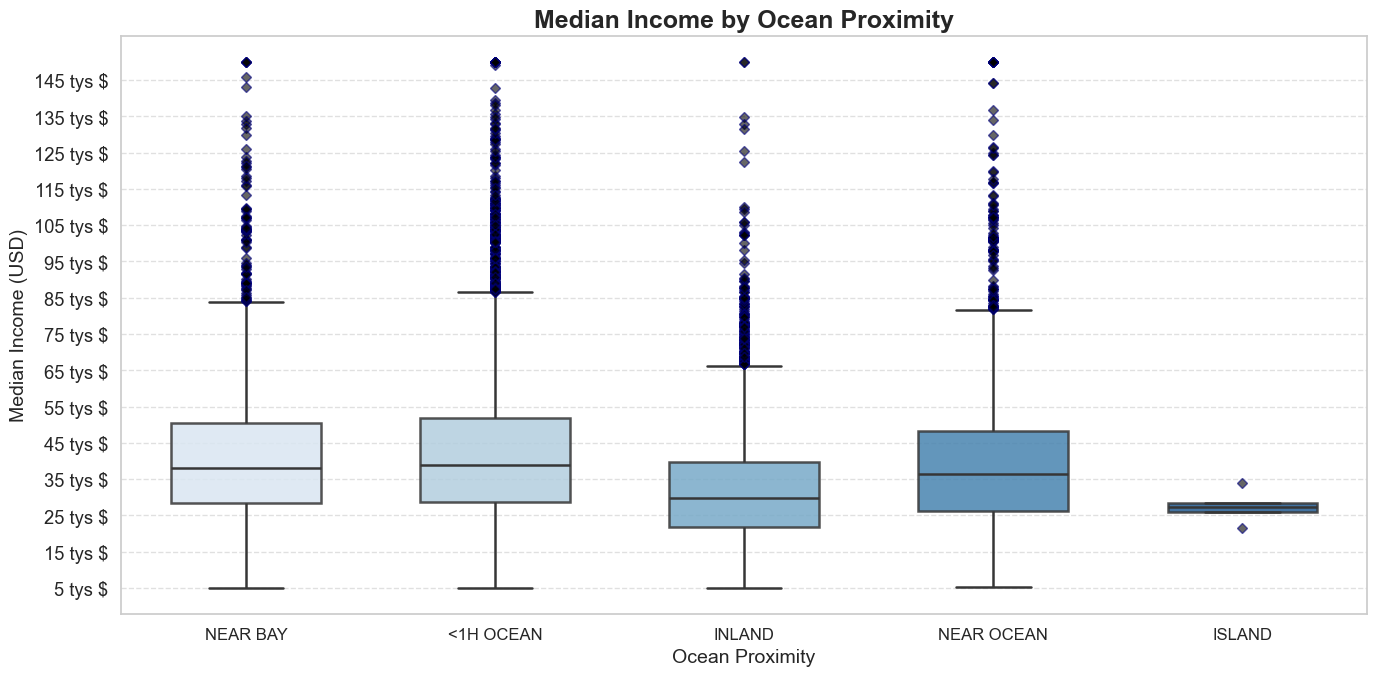

In [73]:
from matplotlib.ticker import FuncFormatter

sns.set(style="whitegrid", font_scale=1.2)

flier_style = dict(
    marker='D',
    markerfacecolor='black',
    markeredgecolor='navy',
    markersize=5,
    alpha=0.6
)

def tys_formatter(x, pos):
    return f'{int(x/1000)} tys $'

formatter = FuncFormatter(tys_formatter)

plt.figure(figsize=(14, 7))
sns.boxplot(
    x='ocean_proximity',
    y='median_income_t',
    data=df,
    palette='Blues',
    width=0.6,
    linewidth=1.8,
    fliersize=5,
    flierprops=flier_style,
    boxprops=dict(alpha=0.85)
)

plt.title('Median Income by Ocean Proximity', fontsize=18, weight='bold')
plt.xlabel('Ocean Proximity', fontsize=14)
plt.ylabel('Median Income (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(np.arange(5000, 155000, 10000))  # od 5 tys. do 150 tys. co 5 tys.
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Bullet\AppData\Local\Temp\ipykernel_4372\3246411026.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


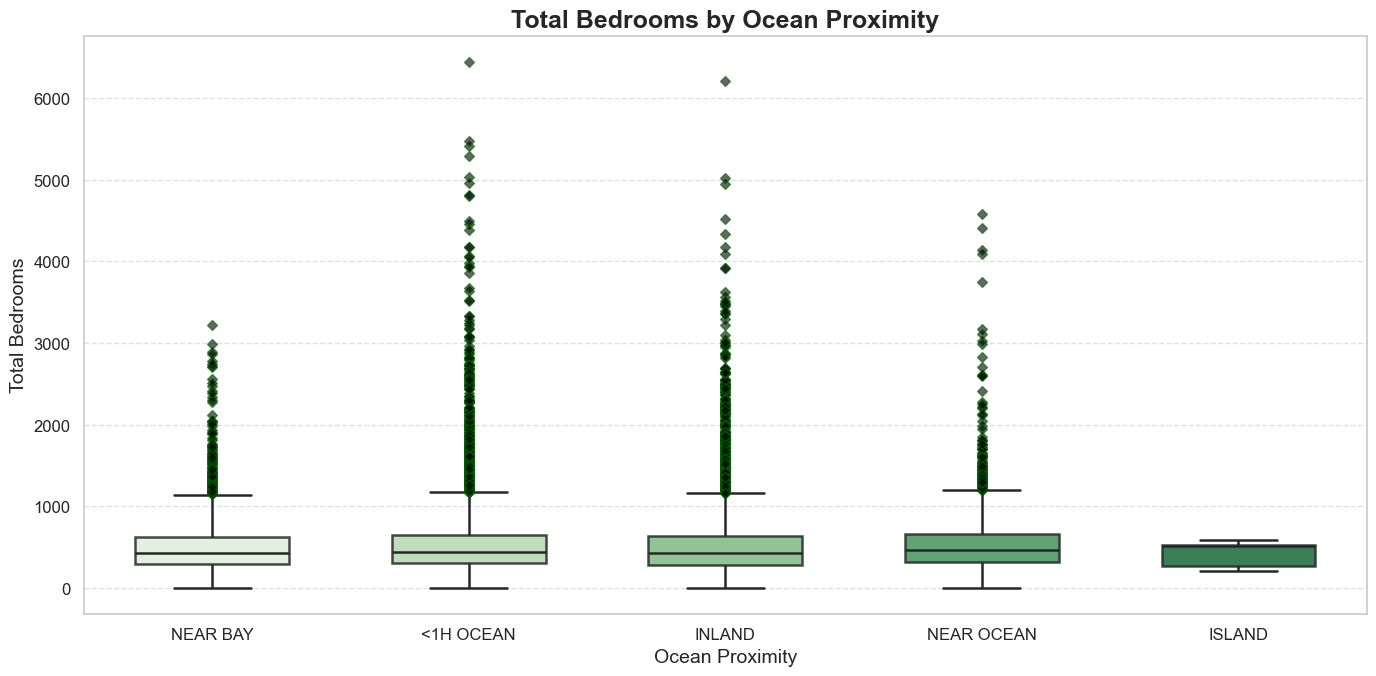

In [74]:

sns.set(style="whitegrid", font_scale=1.2)

flier_style = dict(
    marker='D',               
    markerfacecolor='black',
    markeredgecolor='darkgreen',  
    markersize=5,
    alpha=0.6
)

plt.figure(figsize=(14, 7))
sns.boxplot(
    x='ocean_proximity',
    y='total_bedrooms',
    data=df,
    palette='Greens',
    width=0.6,
    linewidth=1.8,
    fliersize=5,
    flierprops=flier_style,
    boxprops=dict(alpha=0.85)
)

plt.title('Total Bedrooms by Ocean Proximity', fontsize=18, weight='bold')
plt.xlabel('Ocean Proximity', fontsize=14)
plt.ylabel('Total Bedrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Bullet\AppData\Local\Temp\ipykernel_4372\3634408908.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


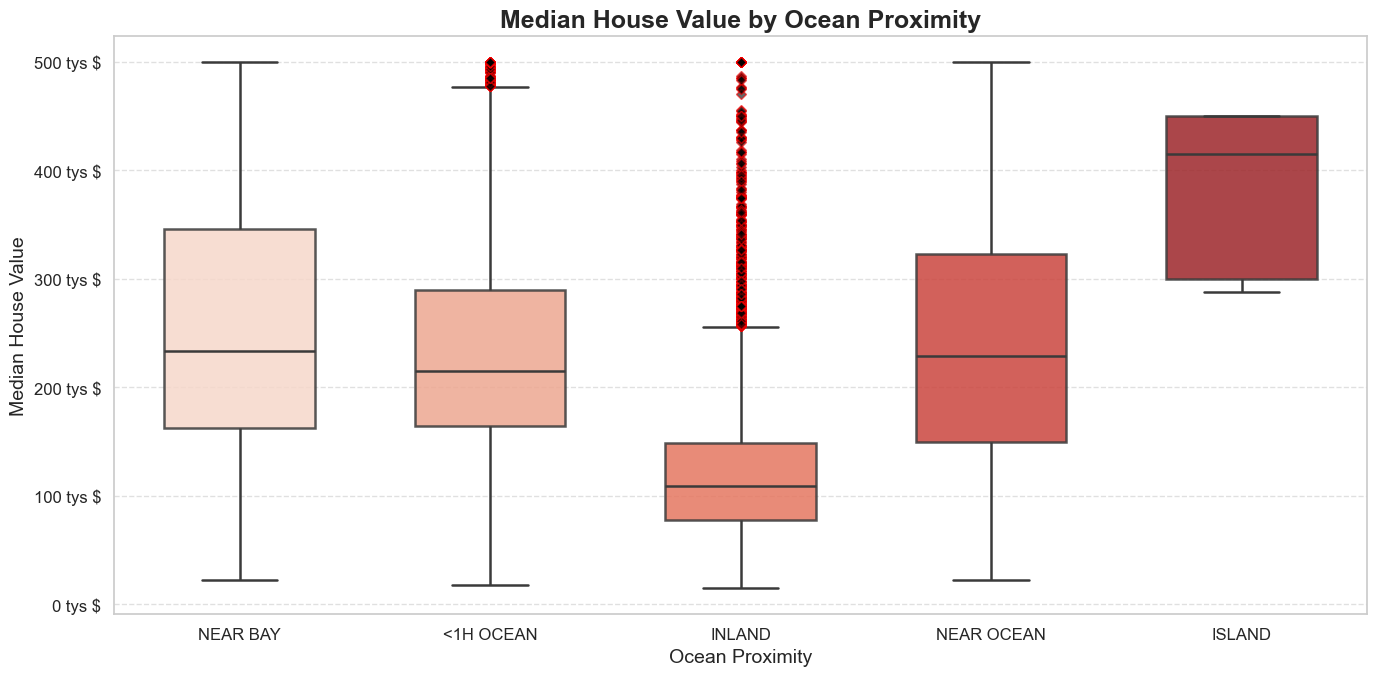

In [75]:
from matplotlib.ticker import FuncFormatter

sns.set(style="whitegrid", font_scale=1.2)

flier_style = dict(
    marker='D',
    markerfacecolor='black',
    markeredgecolor='red',
    markersize=5,
    alpha=0.6
)

def tys_formatter(x, pos):
    return f'{int(x/1000):,} tys $'.replace(',', ' ')

formatter = FuncFormatter(tys_formatter)

plt.figure(figsize=(14, 7))
sns.boxplot(
    x='ocean_proximity',
    y='median_house_value',
    data=df,
    palette='Reds',
    width=0.6,
    linewidth=1.8,
    fliersize=5,
    flierprops=flier_style,
    boxprops=dict(alpha=0.85)
)

plt.title('Median House Value by Ocean Proximity', fontsize=18, weight='bold')
plt.xlabel('Ocean Proximity', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [76]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_t,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,83252.0,6.98,0.15,2.56
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,83014.0,6.24,0.16,2.11
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,72574.0,8.29,0.13,2.80


In [77]:
df.loc[df["ocean_proximity"] =="ISLAND",["median_income_t","median_house_value","population","households","total_rooms","housing_median_age"]].round(2)

,median_income_t,median_house_value,population,households,total_rooms,housing_median_age
8314,21579.0,450000.0,744.0,331.0,1675.0,27.0
8315,28333.0,414700.0,1100.0,431.0,2359.0,52.0
8316,33906.0,300000.0,733.0,288.0,2127.0,52.0
8317,27361.0,450000.0,341.0,160.0,996.0,52.0
8318,26042.0,287500.0,422.0,173.0,716.0,29.0


In [78]:
df.groupby("ocean_proximity")["total_bedrooms"].agg(["count","mean","median","std","max","min"]).round(2)

,count,mean,median,std,max,min
ocean_proximity,,,,,,
<1H OCEAN,9034,546.54,438.0,427.91,6445.0,5.0
INLAND,6496,533.88,423.0,446.12,6210.0,2.0
ISLAND,5,420.40,512.0,169.32,591.0,214.0
NEAR BAY,2270,514.18,423.0,367.89,3226.0,1.0
NEAR OCEAN,2628,538.62,464.0,376.32,4585.0,3.0


In [79]:
df.groupby("ocean_proximity")["total_rooms"].agg(["count","mean","median","std","max","min"]).round(2)

,count,mean,median,std,max,min
ocean_proximity,,,,,,
<1H OCEAN,9034,2627.23,2107.0,2164.15,37937.0,11.0
INLAND,6496,2721.25,2136.0,2390.70,39320.0,2.0
ISLAND,5,1574.60,1675.0,707.55,2359.0,716.0
NEAR BAY,2270,2490.34,2082.5,1823.58,18634.0,8.0
NEAR OCEAN,2628,2587.17,2197.0,1998.04,30405.0,15.0


In [80]:
df.groupby("ocean_proximity")["population"].agg(["count","mean","median","std","max","min"]).round(2)

,count,mean,median,std,max,min
ocean_proximity,,,,,,
<1H OCEAN,9034,1518.44,1246.0,1186.98,35682.0,3.0
INLAND,6496,1392.41,1124.5,1171.24,16305.0,5.0
ISLAND,5,668.00,733.0,301.69,1100.0,341.0
NEAR BAY,2270,1227.88,1033.5,876.10,8276.0,8.0
NEAR OCEAN,2628,1355.64,1137.5,1008.13,12873.0,8.0


In [81]:
df.groupby("ocean_proximity")["households"].agg(["count","mean","median","std","max","min"]).round(2)

,count,mean,median,std,max,min
ocean_proximity,,,,,,
<1H OCEAN,9034,517.42,420.0,392.78,6082.0,4.0
INLAND,6496,478.01,385.0,393.07,5358.0,2.0
ISLAND,5,276.60,288.0,113.20,431.0,160.0
NEAR BAY,2270,487.24,404.5,344.70,3052.0,1.0
NEAR OCEAN,2628,501.53,429.0,345.14,4176.0,3.0


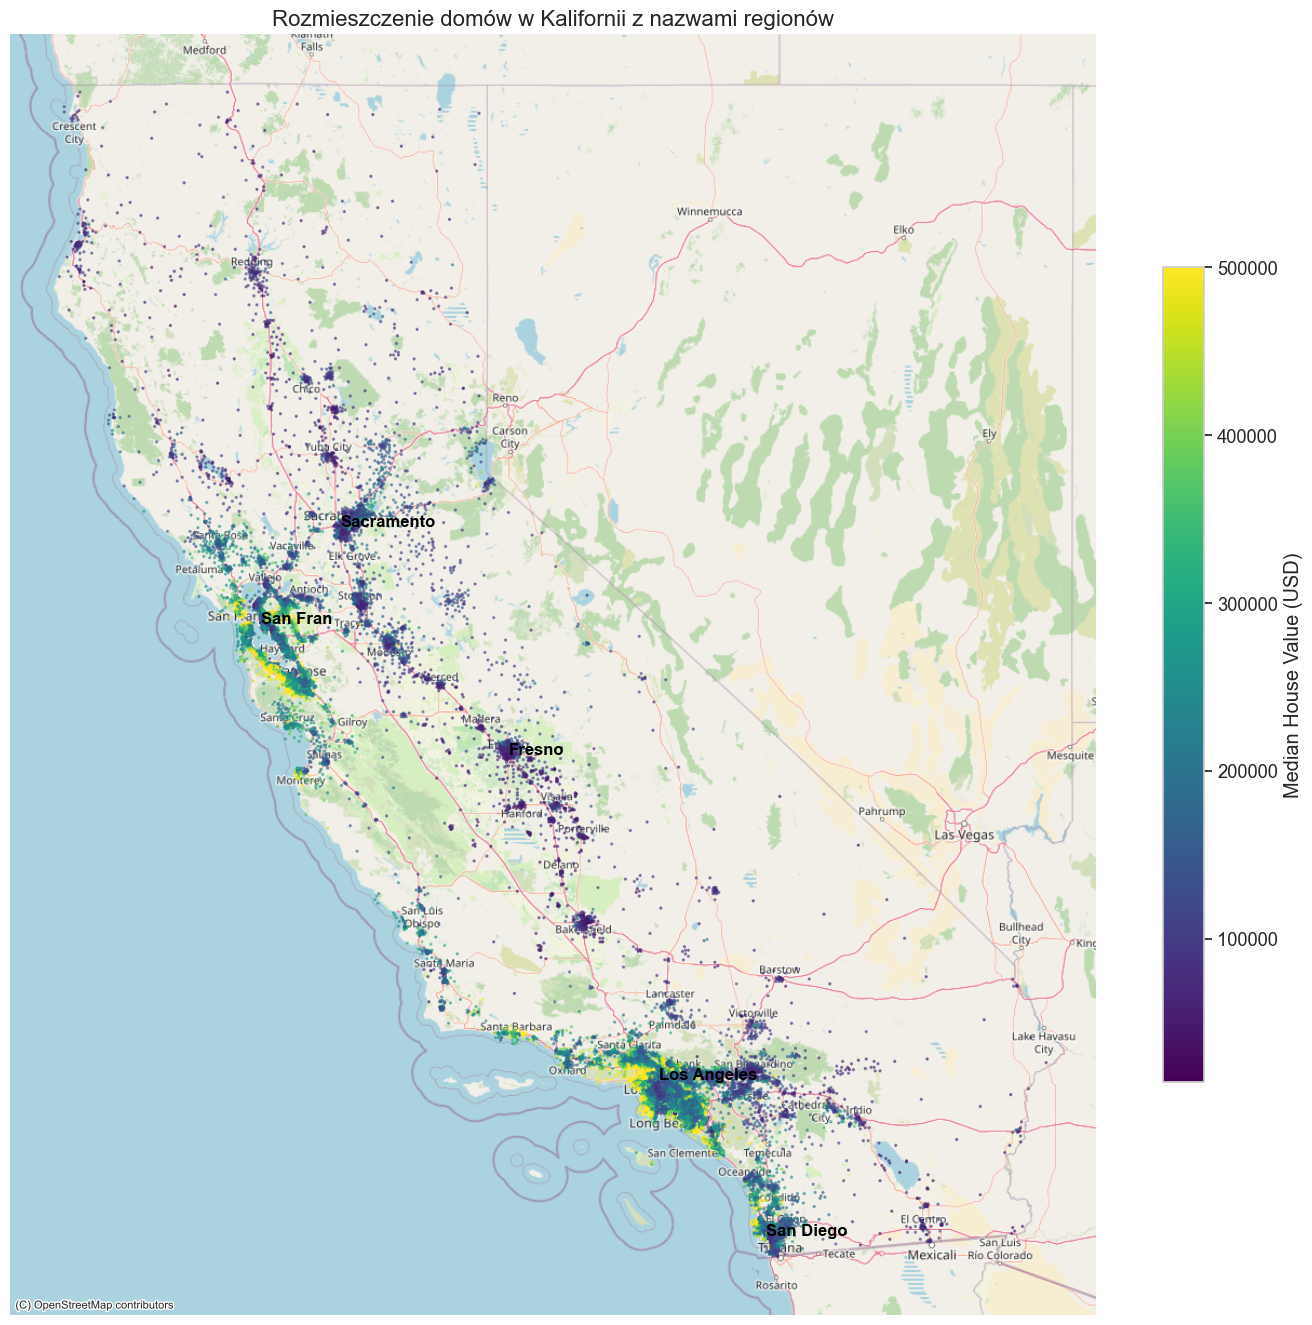

In [82]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(14, 14)) 
gdf.plot(
    ax=ax,
    markersize=2, 
    alpha=0.5,
    column="median_house_value",
    cmap="viridis",
    legend=True,
    legend_kwds={"label": "Median House Value (USD)", "shrink": 0.6}
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

labels = {
    "San Fran": (-122.3, 37.8),
    "Los Angeles": (-118.25, 34.05),
    "San Diego": (-117.16, 32.72),
    "Sacramento": (-121.49, 38.58),
    "Fresno": (-119.78, 36.74)
}

for name, (lon, lat) in labels.items():
    point = gpd.GeoSeries([Point(lon, lat)], crs="EPSG:4326").to_crs(epsg=3857)
    x, y = point.geometry.x[0], point.geometry.y[0]
    ax.text(x, y, name, fontsize=12, weight='bold', color='black')



ax.set_title("Rozmieszczenie domów w Kalifornii z nazwami regionów", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()


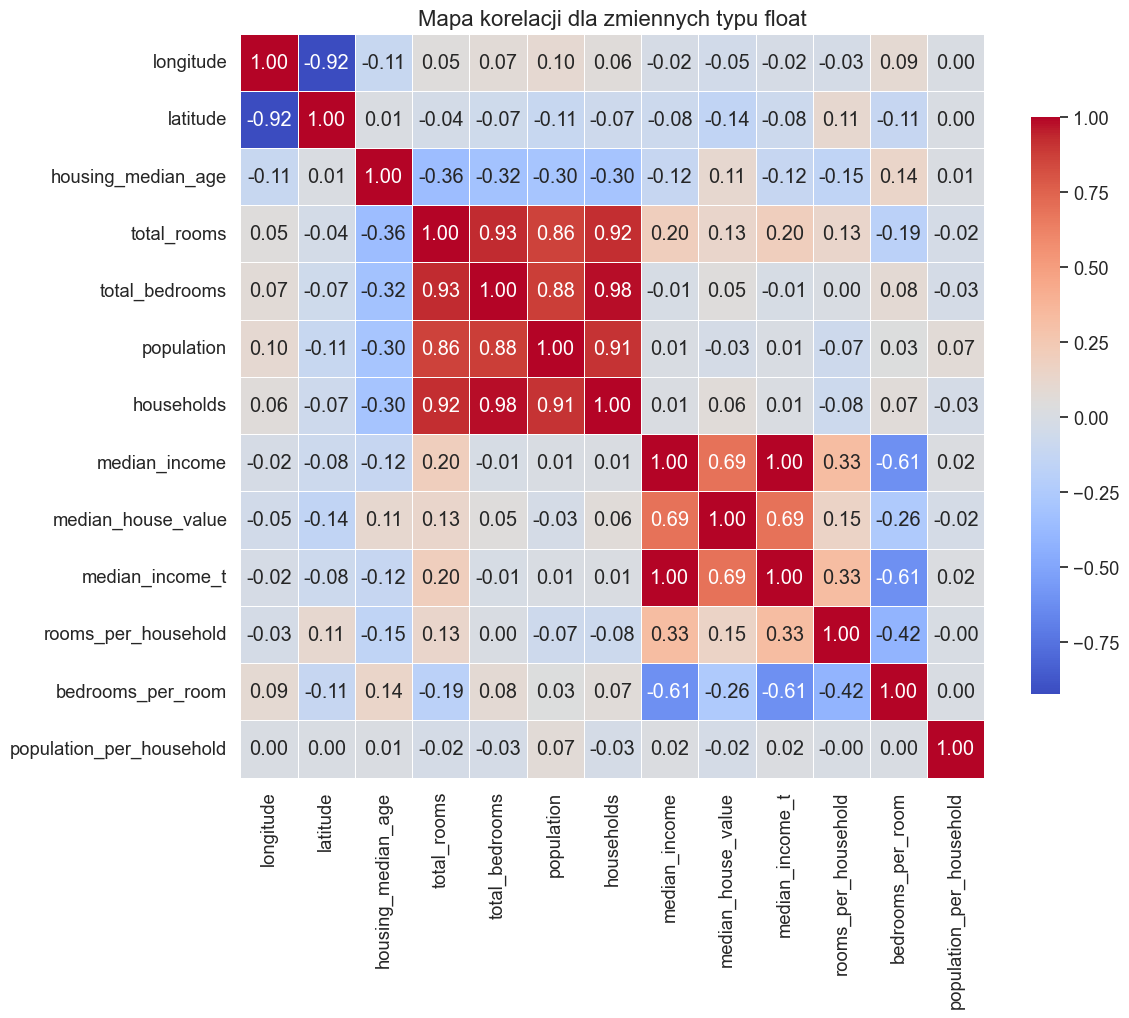

In [83]:
value = df.select_dtypes(float)

plt.figure(figsize=(12, 10))

sns.heatmap(
    value.corr(), 
    annot=True, 
    cmap="coolwarm",       
    fmt=".2f",              
    square=True,            
    linewidths=0.5,         
    cbar_kws={"shrink": 0.75}  
)

plt.title("Mapa korelacji dla zmiennych typu float", fontsize=16)

plt.show()


# Modyfikacje danych 

In [84]:
without_outliers = df[df["median_house_value"] < 490000]


In [85]:
print(without_outliers.head(3))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

   median_income_t  rooms_per_household  bedrooms_per_room  \
0          83252.0                 6.98               0.15   
1          83014.0                 6.24               0.16   
2          72574.0                 8.29               0.13   

   population_per_household  
0                      2.56  
1                      2.11  
2                      2.80  


In [86]:
df_encoded_2 = pd.get_dummies(without_outliers, columns=['ocean_proximity'], prefix='proximity', drop_first=False)


In [87]:
df_encoded_2["proximity_below_1H_OCEAN"] =df_encoded_2["proximity_<1H OCEAN"] 

df_encoded_2["proximity_NEAR_BAY"] =df_encoded_2["proximity_NEAR BAY"] 


df_encoded_2["proximity_NEAR_OCEAN"] =df_encoded_2["proximity_NEAR OCEAN"] 


df_encoded_2.drop(columns=["proximity_<1H OCEAN","proximity_NEAR BAY","proximity_NEAR OCEAN"],inplace=True)


df_encoded_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_t,rooms_per_household,bedrooms_per_room,population_per_household,proximity_INLAND,proximity_ISLAND,proximity_below_1H_OCEAN,proximity_NEAR_BAY,proximity_NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,83252.0,6.98,0.15,2.56,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,83014.0,6.24,0.16,2.11,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,72574.0,8.29,0.13,2.80,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,56431.0,5.82,0.18,2.55,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,38462.0,6.28,0.17,2.18,False,False,False,True,False


# Postac analityczna modelu (Model Deafultowy )

$$
\log(\text{median\_house\_value}) = \beta_0 + 
\beta_1 \cdot \log(\text{median\_income\_t}) + 
\beta_2 \cdot \text{proximity\_INLAND} + 
\beta_3 \cdot \text{proximity\_below\_1H\_OCEAN} + 
\beta_4 \cdot \text{proximity\_ISLAND} + 
\beta_5 \cdot \text{proximity\_NEAR\_OCEAN} + \psi
$$


In [88]:
import numpy as np
import statsmodels.formula.api as smf

df_encoded_2["log_price"] = np.log(df_encoded_2["median_house_value"])
df_encoded_2["log_income"] = np.log(df_encoded_2["median_income_t"])

model_2 = smf.ols(
    formula="log_price ~ log_income + proximity_INLAND + proximity_below_1H_OCEAN +proximity_ISLAND + proximity_NEAR_OCEAN",
    data=df_encoded_2
).fit()

print(model_2.summary())


                             OLS Regression Results                            
Dep. Variable:               log_price   R-squared:                       0.603
Model:                             OLS   Adj. R-squared:                  0.603
Method:                  Least Squares   F-statistic:                     5900.
Date:              niedz., 15 cze 2025   Prob (F-statistic):               0.00
Time:                         10:07:02   Log-Likelihood:                -6260.7
No. Observations:                19408   AIC:                         1.253e+04
Df Residuals:                    19402   BIC:                         1.258e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Train test split 

In [89]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_encoded_2, test_size=0.3, random_state=42)

model_train = smf.ols(
    formula="log_price ~ log_income + proximity_INLAND + proximity_below_1H_OCEAN + proximity_ISLAND + proximity_NEAR_OCEAN",
    data=train_data
).fit()


print(model_train.summary())

                             OLS Regression Results                            
Dep. Variable:               log_price   R-squared:                       0.605
Model:                             OLS   Adj. R-squared:                  0.605
Method:                  Least Squares   F-statistic:                     4161.
Date:              niedz., 15 cze 2025   Prob (F-statistic):               0.00
Time:                         10:07:03   Log-Likelihood:                -4305.7
No. Observations:                13585   AIC:                             8623.
Df Residuals:                    13579   BIC:                             8669.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# MODEL EKONOMETRYCZNY 

# Autocorrelation

,lb_stat,lb_pvalue
10,47054.634408,0.0


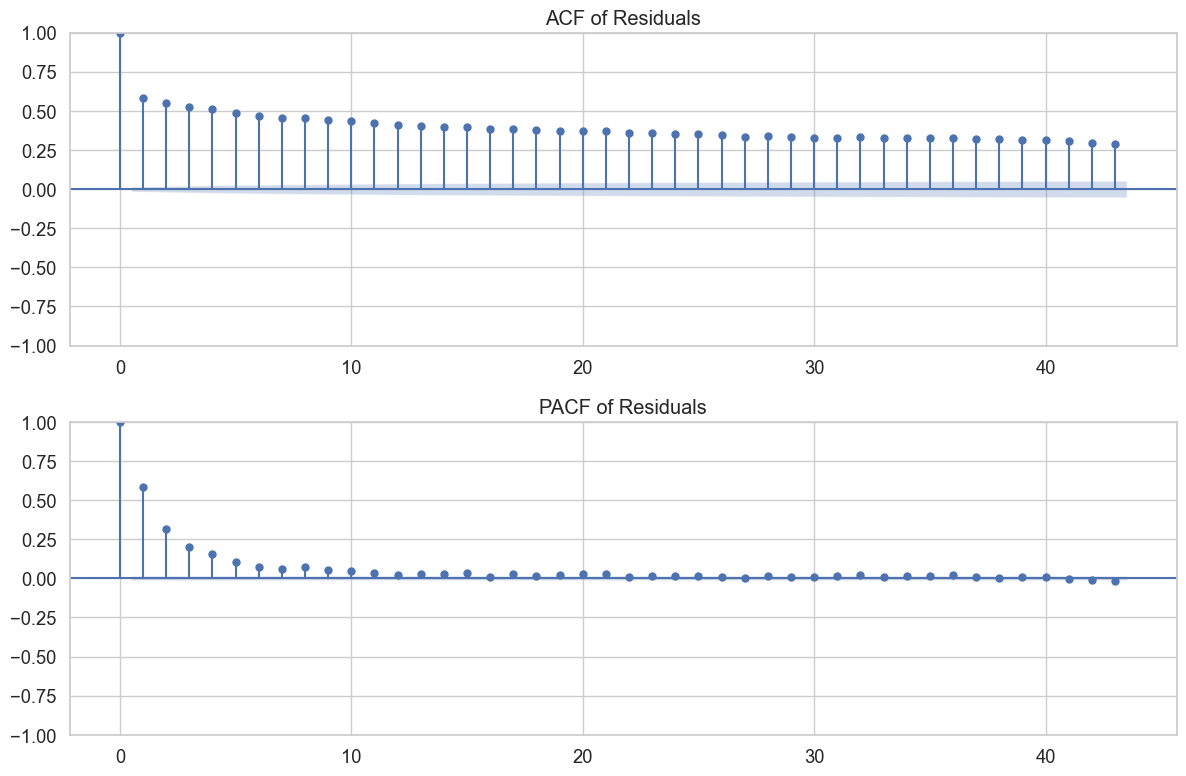

In [90]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


ljungbox_results = acorr_ljungbox(model_2.resid, lags=[10], return_df=True)


fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(model_2.resid, ax=axes[0])
axes[0].set_title("ACF of Residuals")
plot_pacf(model_2.resid, ax=axes[1])
axes[1].set_title("PACF of Residuals")
plt.tight_layout()

ljungbox_results

In [91]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_pvalue, f_stat, f_pvalue = het_breuschpagan(model_2.resid, model_2.model.exog)


print({
    "Breusch-Pagan LM p-value": bp_pvalue,
    "F-statistic p-value": f_pvalue
})


{'Breusch-Pagan LM p-value': 7.282400622208554e-155, 'F-statistic p-value': 7.57681321704838e-158}


# Heteroscedasticity

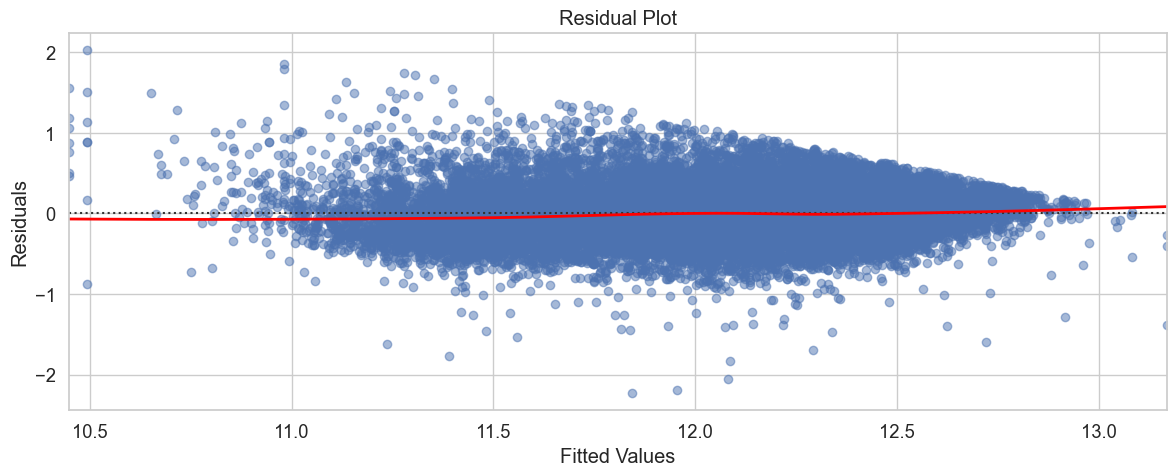

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
sns.residplot(x=model_2.fittedvalues, y=model_2.resid, lowess=True,
              line_kws={'color': 'red', 'lw': 2}, scatter_kws={'alpha': 0.5})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()



In [93]:
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt


white_test = het_white(model_2.resid, model_2.model.exog)
white_stat, white_pvalue = white_test[0], white_test[1]

# (domyślnie sortuje po fitted values)
gq_test = het_goldfeldquandt(model_2.resid, model_2.model.exog) # Domyślnie SORTUJE DZIELI NA 3 CZESCI I DZIELI 1/3 PRZEZ PRZEZ TA TRZECIA
gq_stat, gq_pvalue = gq_test[0], gq_test[1]

{
    "White Test Statistic": white_stat,
    "White Test p-value": white_pvalue,
    "Goldfeld-Quandt Statistic": gq_stat,
    "Goldfeld-Quandt p-value": gq_pvalue
}


{'White Test Statistic': 1164.5834784994895,
 'White Test p-value': 6.269754330328e-244,
 'Goldfeld-Quandt Statistic': 0.8311589474608878,
 'Goldfeld-Quandt p-value': 0.9999999999999999}

# Multicollinearity 

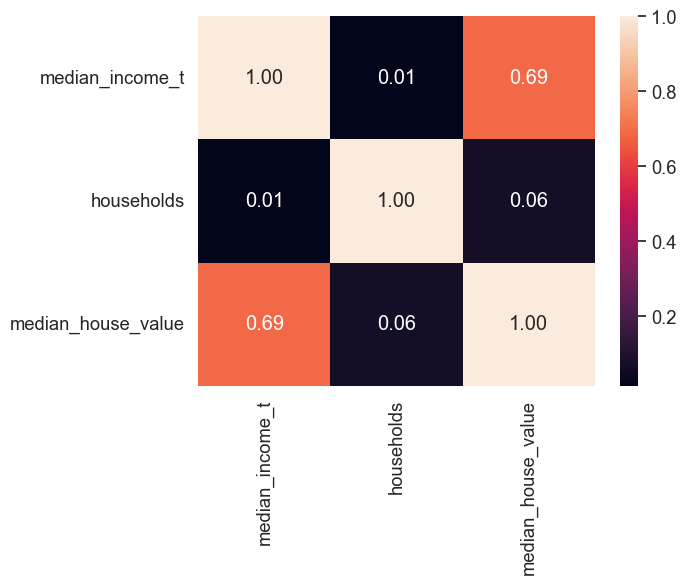

In [94]:
df_encoded_2 =df.loc[:,["median_income_t","households","median_house_value"]]

sns.heatmap(df_encoded_2.corr(), annot=True, fmt=".2f")
plt.show()


# Normality of Residuals 

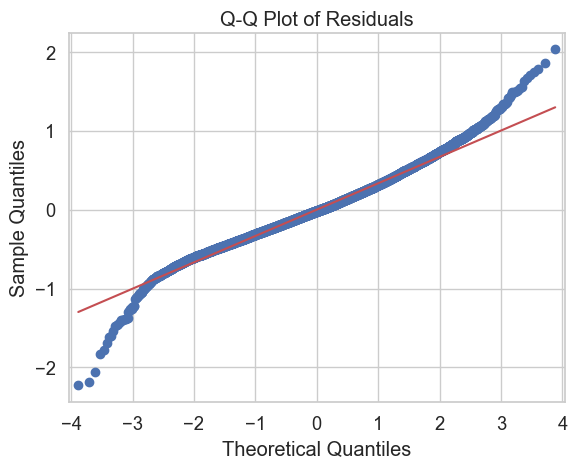

In [95]:
from statsmodels.graphics.gofplots import qqplot

qqplot(model_2.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


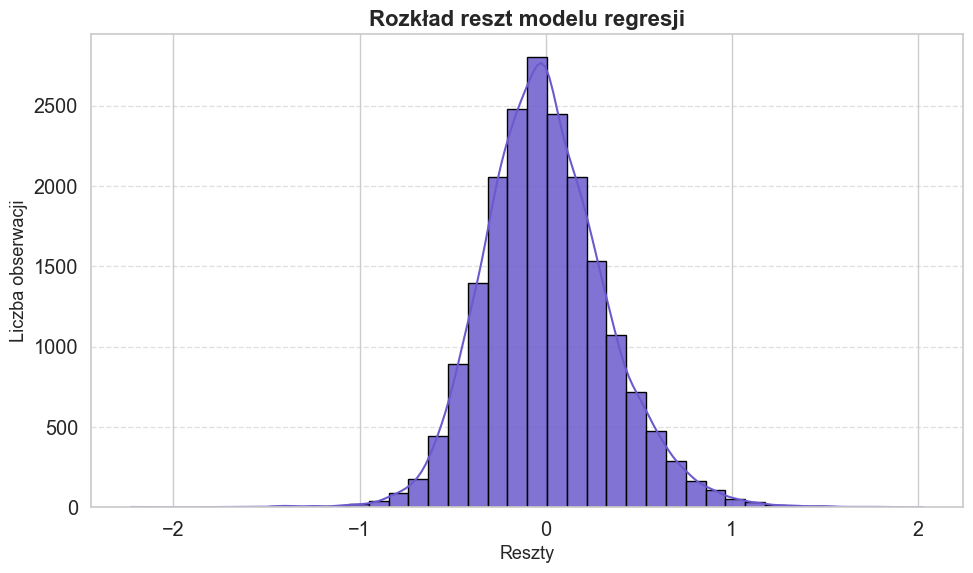

In [96]:
sns.set(style="whitegrid", font_scale=1.3)

plt.figure(figsize=(10, 6))
sns.histplot(
    model_2.resid,
    bins=40,
    kde=True,
    color="slateblue",
    edgecolor="black",
    alpha=0.85
)

plt.title("Rozkład reszt modelu regresji", fontsize=16, weight='bold')
plt.xlabel("Reszty", fontsize=13)
plt.ylabel("Liczba obserwacji", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- Wysoka moc testu bo mamy samples above 20 tys.

In [97]:
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import kstest

# Testy normalności
ad_stat, ad_pvalue = normal_ad(model_2.resid)
ks_stat, ks_pvalue = kstest(model_2.resid, 'norm', args=(model_2.resid.mean(), model_2.resid.std()))

{
    "Anderson-Darling": {"p-value": ad_pvalue},
    "Kolmogorov-Smirnov": { "p-value": ks_pvalue}
}

{'Anderson-Darling': {'p-value': 0.0},
 'Kolmogorov-Smirnov': {'p-value': 7.038068209905712e-20}}

# Metoda estymacji HAC Newey–West

- Szacujemy odporne błędy szacunku na Autokorelacje i Heteroskedastycznosc

In [105]:


model_2_hac = model_train.get_robustcov_results(cov_type="HAC", maxlags=10)

print(model_2_hac.summary())


                             OLS Regression Results                            
Dep. Variable:               log_price   R-squared:                       0.605
Model:                             OLS   Adj. R-squared:                  0.605
Method:                  Least Squares   F-statistic:                     3983.
Date:              niedz., 15 cze 2025   Prob (F-statistic):               0.00
Time:                         10:23:02   Log-Likelihood:                -4305.7
No. Observations:                13585   AIC:                             8623.
Df Residuals:                    13579   BIC:                             8669.
Df Model:                            5                                         
Covariance Type:                   HAC                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Test Reset Ramsaya 

In [99]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model_train, power=2, use_f=True)

reset_stat = reset_test.fvalue
reset_pval = reset_test.pvalue

print({
    "RESET test statistic (F)": reset_stat,
    "RESET test p-value": reset_pval
})


{'RESET test statistic (F)': 12.218456899873214, 'RESET test p-value': 0.00047470049161775003}


# Predykcja na przekształcone zmienne

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


test_data["predicted_log_price"] = model_train.predict(test_data)

# Odlogarytmowanie do oryginalnej skali
test_data["predicted_price"] = np.exp(test_data["predicted_log_price"])
test_data["actual_price"] = np.exp(test_data["log_price"])


mse = mean_squared_error(test_data["actual_price"], test_data["predicted_price"])
mae = mean_absolute_error(test_data["actual_price"], test_data["predicted_price"])
rmse = np.sqrt(mse)


mape = np.mean(np.abs((test_data["actual_price"] - test_data["predicted_price"]) / test_data["actual_price"])) * 100 # MAPE 

{
    "RMSE": rmse,
    "MAE": mae,
    "MSE": mse,
    "MAPE (%)": mape
}


{'RMSE': 66290.05278194387,
 'MAE': 47161.64122361036,
 'MSE': 4394371097.832905,
 'MAPE (%)': 26.569727109577947}

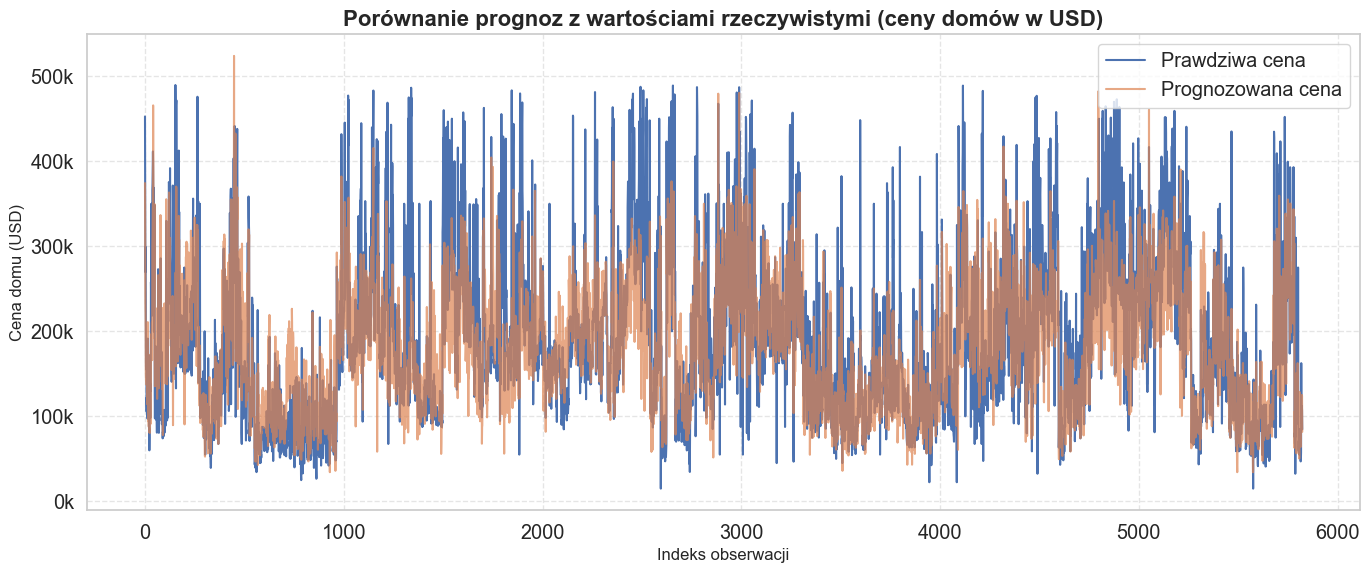

In [101]:
import matplotlib.ticker as ticker

test_data["predicted_price"] = np.exp(test_data["predicted_log_price"])
test_data["actual_price"] = np.exp(test_data["log_price"])

sorted_test = test_data.sort_index().reset_index(drop=True)

plt.figure(figsize=(14, 6))
plt.plot(sorted_test["actual_price"], label="Prawdziwa cena", linewidth=1.5)
plt.plot(sorted_test["predicted_price"], label="Prognozowana cena", alpha=0.7, linewidth=1.5)

plt.title("Porównanie prognoz z wartościami rzeczywistymi (ceny domów w USD)", fontsize=16, weight='bold')
plt.xlabel("Indeks obserwacji", fontsize=12)
plt.ylabel("Cena domu (USD)", fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Interpretacja Błędów Prgonozy Parametrów i wyników : 

- Naruszenie najważniejszych założeń Heteroskedastycznosc,Autokorelacja,Rozkład normalny reszt, -> Remdeium Newey West 

- Nie zostało sprwadzone założenie o Endogeniczności (intuicyjnie można stwierdzić brak sprzężenia zwrotnego ).

- Dodatkowo jest brak perfect jak i imperfect współiniowości świadczą o tym np macierz-korelacje

- Nadal w naszych danych występują wspomianie wyżej naruszenia, lecz dzięki NW estymujemy Standard Errory bez wpływu (autocorr i heteroscedas)

- Dodatkowo rest ramsey wskazuje,że postać analityczna modelu jest żle dobrana, niestety nieudało nam się naprawić tego problemu.

| Wskaźnik               | Wartość | Znaczenie                                                                              |
| ---------------------- | ------- | -------------------------------------------------------------------------------------- |
| **R²**                 | 0.605   | zmienne objaśniająće wyjaśniają 60,5% zmienności zmiennej objaśnianej (przeciętnie)    |
| **Adj. R²**            | 0.605   | Skorygowany R² – niemal taki sam, więc zmienne są istotne.                             |                                          
| **Prob (F-statistic)** | 0.00    | to znaczy że istnieje conajmniej jedna zmienna objaśniająca która wyjaśnia częśc       |    
|                         |            |    zmiennosci zmiennej objasnianej                                                 |


## Interpretacja miar Ex-post


| Miara                                     | Wartość               | Znaczenie                                                                                                                                           |
| ----------------------------------------- | --------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **RMSE** (Root Mean Squared Error)        | `~66,290 USD`         | Średnie odchylenie prognozowanej ceny domu od rzeczywistej to około **66 tys. USD**. 
| **MAE** (Mean Absolute Error)             | `~47,162 USD`         | Średni **bezwzględny** błąd predykcji — przeciętnie model myli się o **47 tys. USD** niezależnie od kierunku (czy przewidział za dużo czy za mało). |                                                  
| **MAPE** (Mean Absolute Percentage Error) | `~26.6%`              | Średni **procentowy** błąd predykcji — przeciętnie model się myli o około **26.6%** względem rzeczywistej ceny domu.                                |

## Interpretacja parametrów 

| Zmienna                         | Parametr | Interpretacja                                                               |
| ------------------------------- | -------- | --------------------------------------------------------------------------- |
| **Intercept**                   | 5.3750   | log cena domu gdy log\_income = 0. (nieinterpretowalne)                     |
| **log\_income**                 | 0.6583   | 1% wzrost dochodu skutkuje średnio **\~0.66% wzrostem ceny domu**.          |
| **proximity\_INLAND**           | -0.5376  | Domy `INLAND` są średnio **\~41.5% tańsze** niż `NEAR BAY`.                 |
| **proximity\_below\_1H\_OCEAN** | -0.0514  | Domy `<1H OCEAN` są średnio **\~5% tańsze** niż `NEAR BAY`.                 |
| **proximity\_ISLAND**           | 0.6567   | Domy `ISLAND` są średnio **\~93% droższe** niż `NEAR BAY`.                  |
| **proximity\_NEAR\_OCEAN**      | -0.0142  |  **Nieistotny statystycznie**                                                |
